In [11]:
import sqlalchemy
import pandas as pd

In [12]:
engine: sqlalchemy.engine.base.Engine = sqlalchemy.create_engine("postgresql+psycopg2://postgres@db/postgres")

In [13]:
stats_query: str = """
                   select
                   count(*) as "records",
                   avg(Steps::int) as "avg steps"
                   from
                   collatz
                   """

with engine.connect() as conn:
    stats = conn.execute(sqlalchemy.text(stats))
    print(stats.all())

[(3393729, Decimal('144.9519640489856438'))]


In [14]:
all_query: str = """
                 select
                 Number::int,
                 Steps::int
                 from
                 collatz
                 """

with engine.connect() as conn:
    all_results = conn.execute(sqlalchemy.text(all_query))
    
collatz_df: pd.DataFrame = pd.DataFrame(all_results.all())
collatz_df.head()

,number,steps
0,1,1
1,2,2
2,3,8
3,4,3
4,5,6


<Axes: >

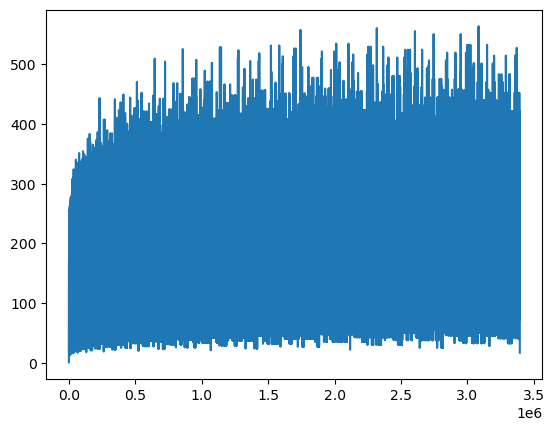

In [18]:
collatz_df["steps"].plot()